# Project 6
by Jan Bauer, (#18-764-571)
together with Adrian Iten, (#15-722-291)


In [1]:
!pip install NEMtropy
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from NEMtropy import UndirectedGraph, DirectedGraph, matrix_generator
from NEMtropy.network_functions import build_adjacency_from_edgelist

     |████████████████████████████████| 61 kB 382 kB/s eta 0:00:011
Mounted at /content/drive


In [2]:
years = [i for i in range (1992, 2003)]
orig_graphs = [nx.read_graphml(f'/content/drive/My Drive/network_science_datasets/ex6/WDN_{year}.txt.graphml') for year in years]

# A06.1 - Exponential Random Graph Models

In [3]:
avg_clusterings = []
reciprocity_coeffs = []

sampled_directed_clusterings = []
sampled_undirected_clusterings = []

sampled_reciprocity_coeffs = []

for i in range(len(years)):
  print(f'----------------Year {years[i]}---------------')
  orig_graph = orig_graphs[i]
  # Calculate metrics on original graph
  avg_clusterings.append(nx.average_clustering(orig_graph))  
  reciprocity_coeffs.append(nx.reciprocity(orig_graph))

  # Create Graphs to be sampled
  directed_graph = DirectedGraph(nx.to_numpy_array(orig_graph))
  undirected_graph = UndirectedGraph(nx.to_numpy_array(orig_graph.to_undirected()))

  print("Solving for Directed Graph")
  directed_graph.solve_tool(model="dcm_exp")
  directed_graph.ensemble_sampler(10, output_dir=f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}/directed_')
  print(f'Relative error strength: {directed_graph.relative_error_strength}')
  
  print("Solving for Undirected Graph")
  undirected_graph.solve_tool(model="cm_exp")
  undirected_graph.ensemble_sampler(10, output_dir=f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}/undirected_')
  print(f'Relative error strength: {undirected_graph.relative_error_strength}')

  directed_clusterings_iter = []
  undirected_clusterings_iter = []
  reciprocity_coeffs_iter = []

  for j in range(10):
    edgelist_directed = np.loadtxt(f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}/directed_{j}.txt')
    edgelist_undirected = np.loadtxt(f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}/undirected_{j}.txt')
    network_dir = nx.DiGraph()
    network_dir.add_edges_from(edgelist_directed)
    network_undir = nx.Graph()
    network_undir.add_edges_from(edgelist_undirected)
    directed_clusterings_iter.append(nx.average_clustering(network_dir))
    undirected_clusterings_iter.append(nx.average_clustering(network_undir))
    reciprocity_coeffs_iter.append(nx.reciprocity(network_dir))
  sampled_directed_clusterings.append(sum(directed_clusterings_iter) / 10)  
  sampled_undirected_clusterings.append(sum(undirected_clusterings_iter) / 10)  
  sampled_reciprocity_coeffs.append(sum(reciprocity_coeffs_iter) / 10)

----------------Year 1992---------------
Solving for Directed Graph


/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:527: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:527: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 3.3671199162199628e-09
Relative error strength: None
Solving for Undirected Graph


/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:527: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:461: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/usr/local/lib/python3.7/dist-packages/NEMtropy/models_functions.py:462: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:527: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 8.283024044430931e-09
Relative error strength: None
----------------Year 1993---------------
Solving for Directed Graph

solution error = 4.432305189538965e-09


/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:527: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)


Relative error strength: None
Solving for Undirected Graph

solution error = 8.431982223555679e-09
Relative error strength: None
----------------Year 1994---------------
Solving for Directed Graph

solution error = 4.296563105299356e-09
Relative error strength: None
Solving for Undirected Graph

solution error = 2.4270718768093502e-09
Relative error strength: None
----------------Year 1995---------------
Solving for Directed Graph

solution error = 3.146041649415565e-09
Relative error strength: None
Solving for Undirected Graph

solution error = 2.2972983515501255e-09
Relative error strength: None
----------------Year 1996---------------
Solving for Directed Graph

solution error = 1.5972574374245596e-09
Relative error strength: None
Solving for Undirected Graph

solution error = 1.8718253613769775e-09
Relative error strength: None
----------------Year 1997---------------
Solving for Directed Graph

solution error = 1.760355416990933e-09
Relative error strength: None
Solving for Undire

## Clustering over Time

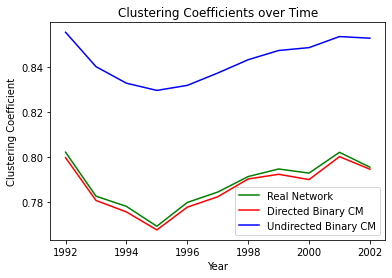

In [4]:
plt.plot(years, avg_clusterings, label="Real Network",color = 'green')
plt.plot(years, sampled_directed_clusterings, label="Directed Binary CM", color = 'red')
plt.plot(years, sampled_undirected_clusterings, label="Undirected Binary CM",color = 'blue')
plt.title('Clustering Coefficients over Time')
plt.xlabel('Year')
plt.ylabel('Clustering Coefficient')
plt.legend()
plt.show()

## Reciprocity over Time

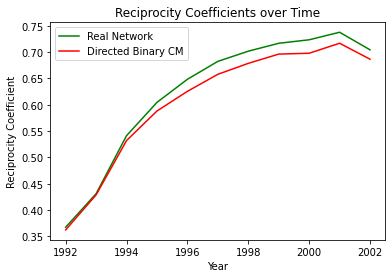

In [5]:
plt.plot(years, reciprocity_coeffs, label="Real Network", color = 'green')
plt.plot(years, sampled_reciprocity_coeffs, label="Directed Binary CM", color= 'red')
plt.title('Reciprocity Coefficients over Time')
plt.xlabel('Year')
plt.ylabel('Reciprocity Coefficient')
plt.legend()
plt.show()

# A06.2 - Weighted ERGMs

In [ ]:
strength_assorts = []
sampled_directed_strength_assorts = []
sampled_undirected_strength_assorts = []

strength_assorts_inin = []
strength_assorts_inout = []
strength_assorts_outout = []

sampled_directed_strength_assorts_inin = []
sampled_directed_strength_assorts_inout = []
sampled_directed_strength_assorts_outout = []

for i in range(len(years)):
  print(f'----------------Year {years[i]}---------------')
  orig_graph = orig_graphs[i]
  # Calculate metrics on original graph
  strength_assorts.append(nx.degree_pearson_correlation_coefficient(orig_graph, weight='weight'))  
  strength_assorts_inin.append(nx.degree_pearson_correlation_coefficient(orig_graph, weight='weight', x='in', y='in'))  
  strength_assorts_inout.append(nx.degree_pearson_correlation_coefficient(orig_graph, weight='weight', x='in', y='out'))  
  strength_assorts_outout.append(nx.degree_pearson_correlation_coefficient(orig_graph, weight='weight', x='out', y='out'))  

  # Create Graphs to be sampled
  directed_graph = DirectedGraph(nx.to_numpy_array(orig_graph))
  undirected_graph = UndirectedGraph(nx.to_numpy_array(orig_graph.to_undirected()))

  print("Solving for Directed Graph")
  directed_graph.solve_tool(model="crema",method="newton",initial_guess="random",adjacency="dcm_exp",max_steps=2500)
  directed_graph.ensemble_sampler(10, output_dir=f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}_crema/directed_')
  print(f'Relative error strength: {directed_graph.relative_error_strength}')
  
  print("Solving for Undirected Graph")
  undirected_graph.solve_tool(model="crema",method="newton",initial_guess="random",adjacency="cm_exp", max_steps = 2500)
  undirected_graph.ensemble_sampler(10, output_dir=f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}_crema/undirected_')
  print(f'Relative error strength: {undirected_graph.relative_error_strength}')

  sampled_directed_strength_assorts_iter = []
  sampled_undirected_strength_assorts_iter = []

  sampled_directed_strength_assorts_inin_iter = []
  sampled_directed_strength_assorts_inout_iter = []
  sampled_directed_strength_assorts_outout_iter = []

  for j in range(10):
    edgelist_directed = np.loadtxt(f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}_crema/directed_{j}.txt')
    edgelist_undirected = np.loadtxt(f'/content/drive/My Drive/network_science_datasets/ex6/sampled_{years[i]}_crema/undirected_{j}.txt')
    network_dir = nx.from_numpy_array(
        build_adjacency_from_edgelist(edgelist = edgelist_directed, is_directed = True, is_sparse = False, is_weighted = True),
        create_using = nx.DiGraph
    )
    network_undir = nx.from_numpy_array(
        build_adjacency_from_edgelist(edgelist = edgelist_undirected, is_directed = False, is_sparse = False, is_weighted = True)
    )
    sampled_directed_strength_assorts_iter.append(nx.degree_pearson_correlation_coefficient(network_dir, weight='weight'))
    sampled_undirected_strength_assorts_iter.append(nx.degree_pearson_correlation_coefficient(network_undir, weight='weight'))
    sampled_directed_strength_assorts_inin_iter.append(nx.degree_pearson_correlation_coefficient(network_dir, weight='weight', x='in', y='in'))
    sampled_directed_strength_assorts_inout_iter.append(nx.degree_pearson_correlation_coefficient(network_dir, weight='weight', x='in', y='out'))
    sampled_directed_strength_assorts_outout_iter.append(nx.degree_pearson_correlation_coefficient(network_dir, weight='weight', x='out', y='out'))
  
  sampled_directed_strength_assorts.append(sum(sampled_directed_strength_assorts_iter) / 10)
  sampled_undirected_strength_assorts.append(sum(sampled_undirected_strength_assorts_iter) / 10)
  sampled_directed_strength_assorts_inin.append(sum(sampled_directed_strength_assorts_inin_iter) / 10)
  sampled_directed_strength_assorts_inout.append(sum(sampled_directed_strength_assorts_inout_iter) / 10)
  sampled_directed_strength_assorts_outout.append(sum(sampled_directed_strength_assorts_outout_iter) / 10)



----------------Year 1992---------------
Solving for Directed Graph


/usr/local/lib/python3.7/dist-packages/numba/core/utils.py:527: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  category=NumbaExperimentalFeatureWarning)



solution error = 373479.84326171875
Relative error strength: 2.0610635907527877e-06
Solving for Undirected Graph

solution error = 0.00034676119685173035
Relative error strength: 9.878330160359372e-11
----------------Year 1993---------------
Solving for Directed Graph

solution error = 366132.5620727539
Relative error strength: 0.0002949283111318228
Solving for Undirected Graph

solution error = 874.5286723971367
Relative error strength: 5.3118899663531e-06
----------------Year 1994---------------
Solving for Directed Graph

solution error = 190253.39221191406
Relative error strength: 2.0822412416692517e-05
Solving for Undirected Graph

solution error = 0.08523949235677719
Relative error strength: 8.467075886945108e-09
----------------Year 1995---------------
Solving for Directed Graph

solution error = 103789.57208251953
Relative error strength: 2.751184655757768e-07
Solving for Undirected Graph

solution error = 106.32040787488222
Relative error strength: 5.875929163651141e-06
-----

## Strength Assortativity over Time

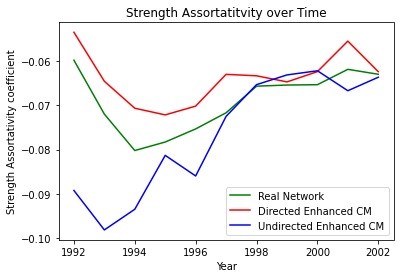

In [ ]:
plt.plot(years, strength_assorts, label="Real Network",color = 'green')
plt.plot(years, sampled_directed_strength_assorts, label="Directed Enhanced CM", color = 'red')
plt.plot(years, sampled_undirected_strength_assorts, label="Undirected Enhanced CM",color = 'blue')
plt.title('Strength Assortatitvity over Time')
plt.xlabel('Year')
plt.ylabel('Strength Assortativity coefficient')
plt.legend()
plt.show()

## Pairs of Assortativity

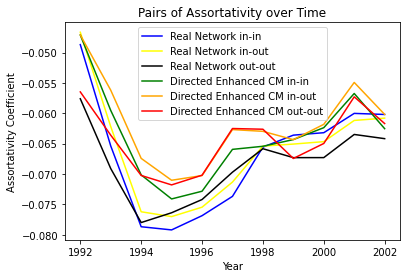

In [ ]:
plt.plot(years, strength_assorts_inin, label="Real Network in-in", color = 'blue')
plt.plot(years, strength_assorts_inout, label="Real Network in-out", color = 'yellow')
plt.plot(years, strength_assorts_outout, label="Real Network out-out", color = 'black')
plt.plot(years, sampled_directed_strength_assorts_inin, label="Directed Enhanced CM in-in", color = 'green')
plt.plot(years, sampled_directed_strength_assorts_inout, label="Directed Enhanced CM in-out", color = 'orange')
plt.plot(years, sampled_directed_strength_assorts_outout, label="Directed Enhanced CM out-out", color = 'red')
plt.title('Pairs of Assortativity over Time')
plt.xlabel('Year')
plt.ylabel('Assortativity Coefficient')
plt.legend()
plt.show()

# A06.3 - Drawing conclusions

## Clustering and Reprocity
As visible from the plots in A6.1, the clustering of the real network is not varying strongly over time. Generally, it is in range [0.76, 0.82]. 

The reprocity on the other hand increases heavily over time for the real network, from ~0.35 to ~0.7.

A possible interpretation of this phenomena is that whilst there had always been trade in local areas (indicated by the high clustering), the global trading has also become bidirectional. A potential reason may be that some countries opened their markets to actively participate in global trade. Specifically, WTO (world trade organization) was founded in 1995, pushing that phenomena. Additionally, the Internet has also evolved in those years, probably simplifying worldwide bidirectional trading.

## Strength Assortativity
As visible from the plot in A6.2, the strength assortativity of the real network is only varying in range [-0.08, -0.06] and therefore not showing too much variance.

A possible interpretation of this phenomena could be that despite the increase in reprocity (by more bidirectional worldwide trading), the types of connection do not change. In the end the countries tend to export to other countries independent of their trading they do (or do not do) with other countries. This also allows specialization, where e. g. Switzerland does export financial services or cheese to all the world and on the other hand import different goods from countries all over the world (like petrol, spices, electronic devices, ...). 

## Inference of the UBCM, DBCM and DECM models
The models show a very low (relative) error strength when being run for a sufficient amount of iterations. In order to achieve this, we raised this maximum iteration number to 2'500. When looking at the plots, it is visible that UBCM and DBCM models can model the clustering, which does not change drastically over time, quite well, with the undirected model slightly overestimating the clustering. The DBCM model can reproduce the phenomena of the reciprocity increasing over time pretty accurately.

The DECM model does model the strength assortativity with a low error, and is more precised than the UECM model. Looking at the undirected model, it could be suspected that there may be a slight increase over time - which there is not according to the real network.

In conclusion, we can see that the models can generally reproduce the real network very well, with a directed model being superior. This is not too surprising as an undirected representation of an originally directed network leads to a certain loss of information.
